# NO Data Examples

This notebook is to demostrate how to use the application to extract data from the neuron data set and perform convenient analysis.

## 1. The NOData class

The NOData class mainly serve as a database and allow us to run queries to get cells that we want.

In [4]:
import numpy as np
import pandas as pd

# Load the data module
from data import NOData

In [5]:
# Create a data object, where our data is located at
data = NOData()

### a. Avalibale Sessions
The session_nrs and sessions attributes allow us to see what are the available sessions for us to query.

In [9]:
# a session property that we can see what are the sessions available for analysis
# Show the first 10 available sessions
data.session_nrs[0:10]

[5, 6, 7, 9, 17, 18, 20, 21, 23, 24]

In [51]:
# get the information for a particular session
data.sessions[5]

{'session': 'P9HMH_032306',
 'session_id': 'P9S1',
 'experiment_id_learn': 80,
 'experiment_id_recog': 81,
 'task_descr': 'NO',
 'variant': 1,
 'block_id_learn': 1,
 'block_id_recog': 2,
 'patient_nb': 1,
 'patient_session': 1,
 'diagnosis_code': 1}

### b. ls_cells(session_nr)
This method allows us to show all the available cells for a particular session number

In [53]:
# All the combination of the channel ids and cluster ids are shown for each session 
data.ls_cells(5)[0:10]

[(1, 1),
 (2, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (4, 2),
 (5, 1),
 (7, 1),
 (8, 1),
 (8, 2)]

### c. pop_cell(session_nr, (channelid, clusterid))

In [54]:
# We can query the cell that we want using the session number, channel id and cluster id
cell = data.pop_cell(5, (2, 2))
print(cell.session_nr)
print(cell.session_name)
print(cell.channel_nr)

5
P9HMH_032306
2


## 2. The Cell class

After we know which session we want to look at, we can list all the cells available for that particular session. From the list, we can query the cell from the database and do single cell analysis easily. The attributes of the Cell class has all the necessary information of a cell, for example trial spike trains, brain area, p values, and etc.

### a. Some Attributes of A Cell

The cell class contain all the necessary information as attributes for a particular cell, for example:

In [55]:
print('session name is: ' + cell.session_name)
print('belong to this brain area: ' + str(cell.brain_area_id))
print('The first 10 raw spike timestamps: ')
print(cell.raw_spike_timestamps[0:10])
# We might want to see what are the p values for different tests:
print('P-value for the vs cell test: ' + str(cell.p_vs))
print('P-value for the ms cell test: ' + str(cell.p_ms))
print('P-value for the vs baseline test: ' + str(cell.p_vs_baseline))

session name is: P9HMH_032306
belong to this brain area: 2
The first 10 raw spike timestamps: 
[4.23472456e+09 4.23545232e+09 4.23584600e+09 4.23599672e+09
 4.23620676e+09 4.23622828e+09 4.23635544e+09 4.23662684e+09
 4.23700520e+09 4.23716792e+09]
P-value for the vs cell test: 4.204622375758299e-05
P-value for the ms cell test: 0.569
P-value for the vs baseline test: 0.00019829321484054715


### b. Raster Plot and PSTH Plot
The cell class has two plotting methods for now: psth() and raster()

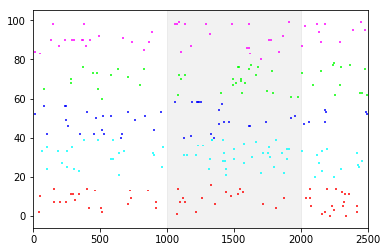

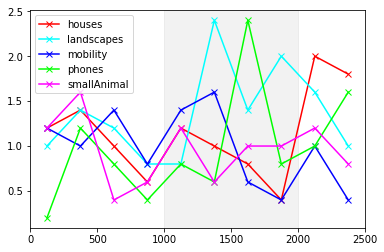

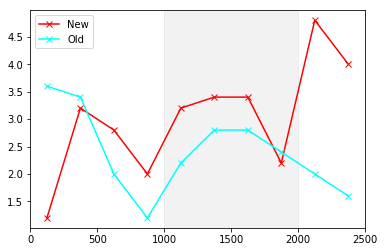

In [73]:
# This allows you to do some basic visualization 
cell.raster()
cell.psth('visual')
cell.psth('memory')

# 3. The Trial class
Each cell has 100 trials. A cell object has a trials attribute that allows us to query all the trials information.

### a. Some Attributes of a trial

In [62]:
# Get the trials from the cell
print('The category of the a trial of the cell is: ' + str(cell.trials[20].category))
print('The response of the a trial of the cell is: ' + str(cell.trials[20].response_recog))
print('The raw spike timestamps for a trial of the cell is: ')
print(cell.trials[20].trial_timestamps)

The category of the a trial of the cell is: 1
The response of the a trial of the cell is: 6
The raw spike timestamps for a trial of the cell is: 
[2.24000e+03 9.76000e+03 4.40640e+05 7.85320e+05 9.51480e+05 9.77160e+05
 1.07008e+06 1.32652e+06 1.39660e+06 1.39836e+06 1.44256e+06 1.72164e+06
 1.74296e+06 2.01756e+06 2.22752e+06 2.54396e+06 2.92820e+06 3.00732e+06
 3.23436e+06 3.26112e+06 3.33916e+06]


### b. win_spike_count() and win_spike_rate()
We can use these two methods to get the spike rate and the spike count for a particular time in a trial.

In [63]:
print(cell.trials[20].win_spike_count(1200, 2700))

9


In [64]:
print(cell.trials[20].win_spike_rate(1200, 2700))

6.0


# 4. Example Analysis

In [66]:
### a. Get highly siginificant vs cells:
high_sig_vs_cells = []
for session_nr in data.session_nrs:
    for cell_index in data.ls_cells(session_nr):
        cell = data.pop_cell(session_nr, cell_index)
        if cell:
            if cell.p_vs < 0.000005:
                high_sig_vs_cells.append(cell)

C:\Users\liang134\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:2933: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


source file does not exist, return empty cell.
source file does not exist, return empty cell.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the event data, each event should have 100 trials.
Somethings wrong with the even

The warnings above shows some of the source files are correpted, and these cell files are ignored.
Now we have the list of highly significant vs cells, let's try to plot the raster and PSTH plots of them.

In [67]:
len(high_sig_vs_cells)

21

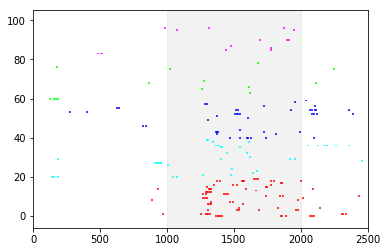

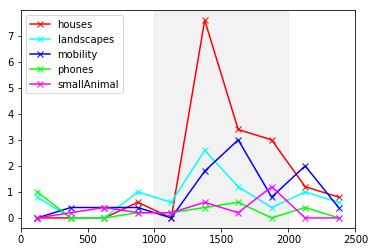

In [72]:
high_sig_vs_cells[0].raster()
high_sig_vs_cells[0].psth()

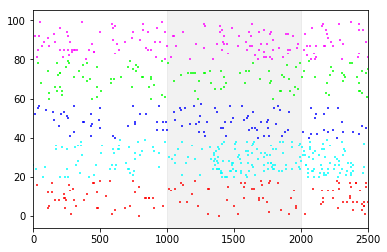

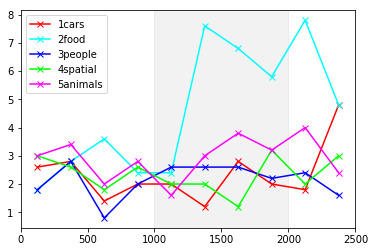

In [71]:
high_sig_vs_cells[1].raster()
high_sig_vs_cells[1].psth()